# **Reliance Industries**

# **Stock Analysis and Forecasting**
**Business Objective**

* Predict the Reliance Industries Stock Price for the next 30 days.

* There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 22-09-2022 to 22-09-2023 for Reliance Industries stock.

* Split the last year into a test set- to build a model to predict stock price.

* Find short term, & long term trends.

* Understand how it is impacted from external factors or any big external events.

* Forecast for next 30 days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline


import warnings
warnings.filterwarnings("ignore")


# **Collection of Dataset**
* For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

* We collected data from 22-09-2022 to 22-09-2023.

In [2]:
data=pd.read_csv("RELIANCE.NS.csv")

# **About the data**
* Date: Date of trade

* Open: Opening Price of Stock

* High: Highest price of stock on that day

* Low: Lowest price of stock on that day

* Close: Close price adjusted for splits.

* Adj Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

* Volume: Volume of stock on that day

In [3]:
data

Date         Open         High          Low        Close  \
0    2022-09-22  2486.000000  2503.000000  2472.100098  2486.100098   
1    2022-09-23  2485.000000  2495.949951  2436.100098  2439.500000   
2    2022-09-26  2394.050049  2417.800049  2375.149902  2377.350098   
3    2022-09-27  2394.000000  2426.000000  2360.100098  2396.250000   
4    2022-09-28  2360.350098  2378.000000  2327.100098  2332.449951   
..          ...          ...          ...          ...          ...   
244  2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098   
245  2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951   
246  2023-09-20  2423.050049  2427.600098  2355.000000  2382.149902   
247  2023-09-21  2374.949951  2390.100098  2360.000000  2364.800049   
248  2023-09-22  2376.000000  2382.449951  2350.000000  2354.949951   

       Adj Close    Volume  
0    2477.348877   4757219  
1    2430.912842   4397194  
2    2368.981689   5759298  
3    2387.815186   7455448  
4    2324.239746   7844140  
..           ...       ...  
244  2457.850098  12734296  
245  2436.449951   3758150  
246  2382.149902  28540942  
247  2364.800049   6113091  
248  2354.949951   9583430  

[249 rows x 7 columns]

In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.shape

(249, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [7]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
data.head()

Date         Open         High          Low        Close  \
0  2022-09-22  2486.000000  2503.000000  2472.100098  2486.100098   
1  2022-09-23  2485.000000  2495.949951  2436.100098  2439.500000   
2  2022-09-26  2394.050049  2417.800049  2375.149902  2377.350098   
3  2022-09-27  2394.000000  2426.000000  2360.100098  2396.250000   
4  2022-09-28  2360.350098  2378.000000  2327.100098  2332.449951   

     Adj Close   Volume  
0  2477.348877  4757219  
1  2430.912842  4397194  
2  2368.981689  5759298  
3  2387.815186  7455448  
4  2324.239746  7844140

In [9]:
data.tail()

Date         Open         High          Low        Close  \
244  2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098   
245  2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951   
246  2023-09-20  2423.050049  2427.600098  2355.000000  2382.149902   
247  2023-09-21  2374.949951  2390.100098  2360.000000  2364.800049   
248  2023-09-22  2376.000000  2382.449951  2350.000000  2354.949951   

       Adj Close    Volume  
244  2457.850098  12734296  
245  2436.449951   3758150  
246  2382.149902  28540942  
247  2364.800049   6113091  
248  2354.949951   9583430

In [10]:
missing_values_count = data.isnull().sum()


In [11]:
total_missing_values = missing_values_count.sum()


In [12]:
total_missing_values

0

#  **EDA:EXPLORATORY DATA ANALYSIS**
* Analysis is only based on Open, High, Low, close price and volume

* There is no need of Adj Close

In [13]:
# Removing "Adj Close" columnfrom dataset
data_1=data.drop(["Adj Close"],axis=1).reset_index(drop=True)
data_1

Date         Open         High          Low        Close    Volume
0    2022-09-22  2486.000000  2503.000000  2472.100098  2486.100098   4757219
1    2022-09-23  2485.000000  2495.949951  2436.100098  2439.500000   4397194
2    2022-09-26  2394.050049  2417.800049  2375.149902  2377.350098   5759298
3    2022-09-27  2394.000000  2426.000000  2360.100098  2396.250000   7455448
4    2022-09-28  2360.350098  2378.000000  2327.100098  2332.449951   7844140
..          ...          ...          ...          ...          ...       ...
244  2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098  12734296
245  2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951   3758150
246  2023-09-20  2423.050049  2427.600098  2355.000000  2382.149902  28540942
247  2023-09-21  2374.949951  2390.100098  2360.000000  2364.800049   6113091
248  2023-09-22  2376.000000  2382.449951  2350.000000  2354.949951   9583430

[249 rows x 6 columns]

In [14]:
# Finding duplicate columns, if any
data_1[data_1.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [15]:
data_1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [16]:
data_1.describe()


Open         High          Low        Close        Volume
count   249.000000   249.000000   249.000000   249.000000  2.490000e+02
mean   2477.553810  2496.526496  2455.008645  2475.208643  6.183713e+06
std     116.672752   118.814967   116.960104   119.562165  3.275971e+06
min    2215.000000  2220.000000  2180.000000  2201.250000  0.000000e+00
25%    2394.050049  2416.949951  2364.000000  2382.550049  4.060722e+06
50%    2475.000000  2491.100098  2456.500000  2474.600098  5.440967e+06
75%    2550.000000  2569.850098  2525.500000  2550.250000  7.291995e+06
max    2830.000000  2856.000000  2797.000000  2841.850098  2.854094e+07

In [17]:
data_1.corr()

Open      High       Low     Close    Volume
Open    1.000000  0.988417  0.987214  0.972924 -0.071518
High    0.988417  1.000000  0.985740  0.990831 -0.030496
Low     0.987214  0.985740  1.000000  0.986812 -0.108725
Close   0.972924  0.990831  0.986812  1.000000 -0.050661
Volume -0.071518 -0.030496 -0.108725 -0.050661  1.000000

In [18]:
# Setting the date column as index
data_1=data_1.set_index('Date')
data_1

Open         High          Low        Close    Volume
Date                                                                    
2022-09-22  2486.000000  2503.000000  2472.100098  2486.100098   4757219
2022-09-23  2485.000000  2495.949951  2436.100098  2439.500000   4397194
2022-09-26  2394.050049  2417.800049  2375.149902  2377.350098   5759298
2022-09-27  2394.000000  2426.000000  2360.100098  2396.250000   7455448
2022-09-28  2360.350098  2378.000000  2327.100098  2332.449951   7844140
...                 ...          ...          ...          ...       ...
2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098  12734296
2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951   3758150
2023-09-20  2423.050049  2427.600098  2355.000000  2382.149902  28540942
2023-09-21  2374.949951  2390.100098  2360.000000  2364.800049   6113091
2023-09-22  2376.000000  2382.449951  2350.000000  2354.949951   9583430

[249 rows x 5 columns]

Text(0.5, 1.0, 'Low')

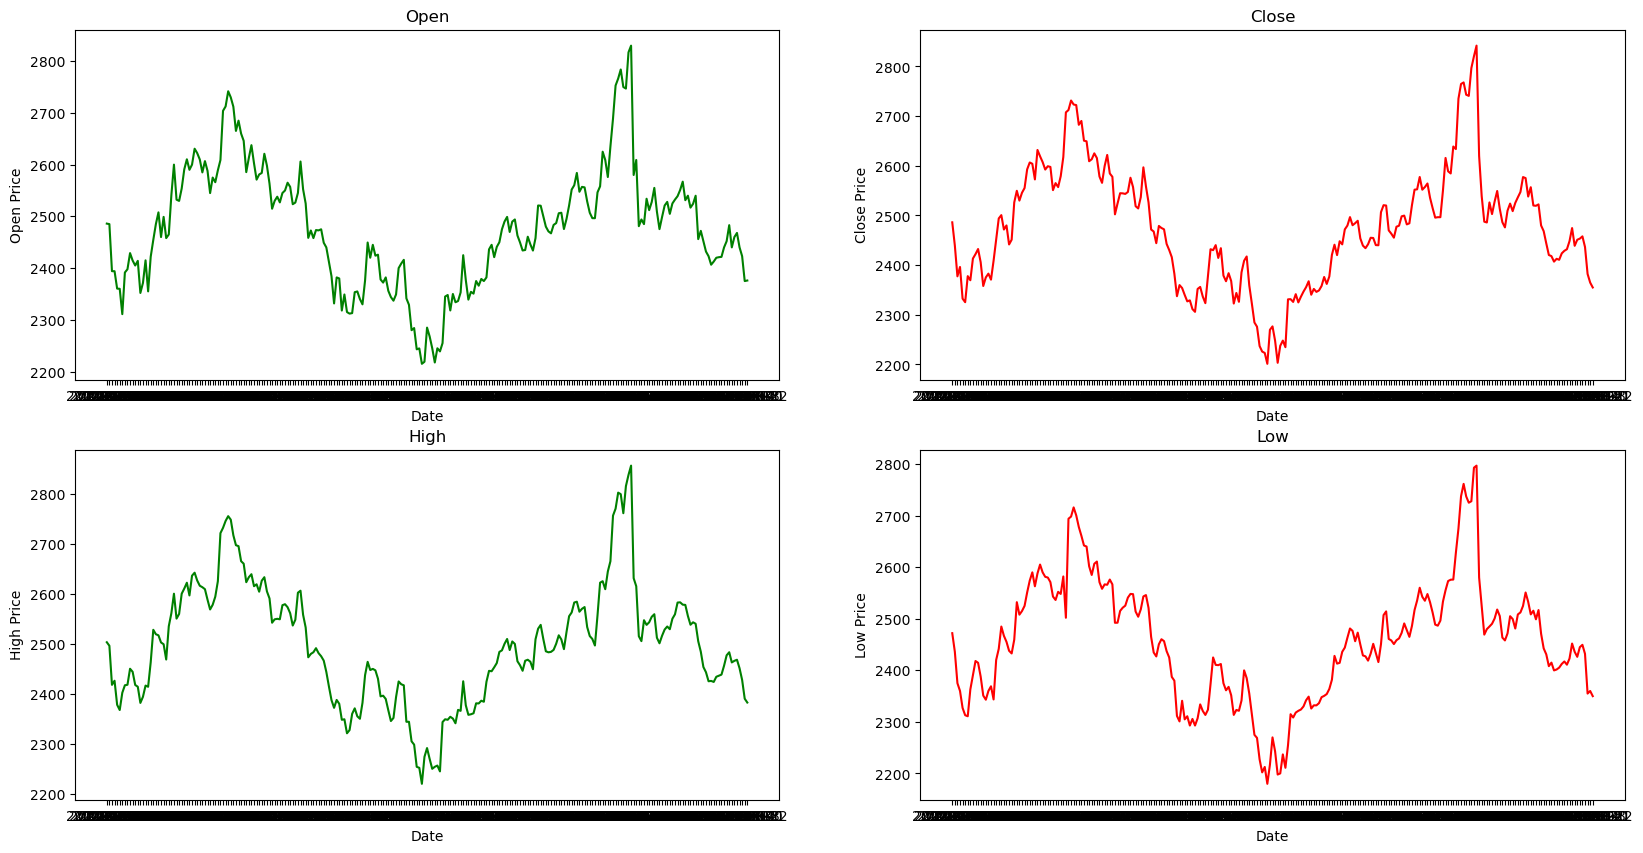

In [19]:

plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(data_1['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(data_1['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(data_1['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(data_1['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

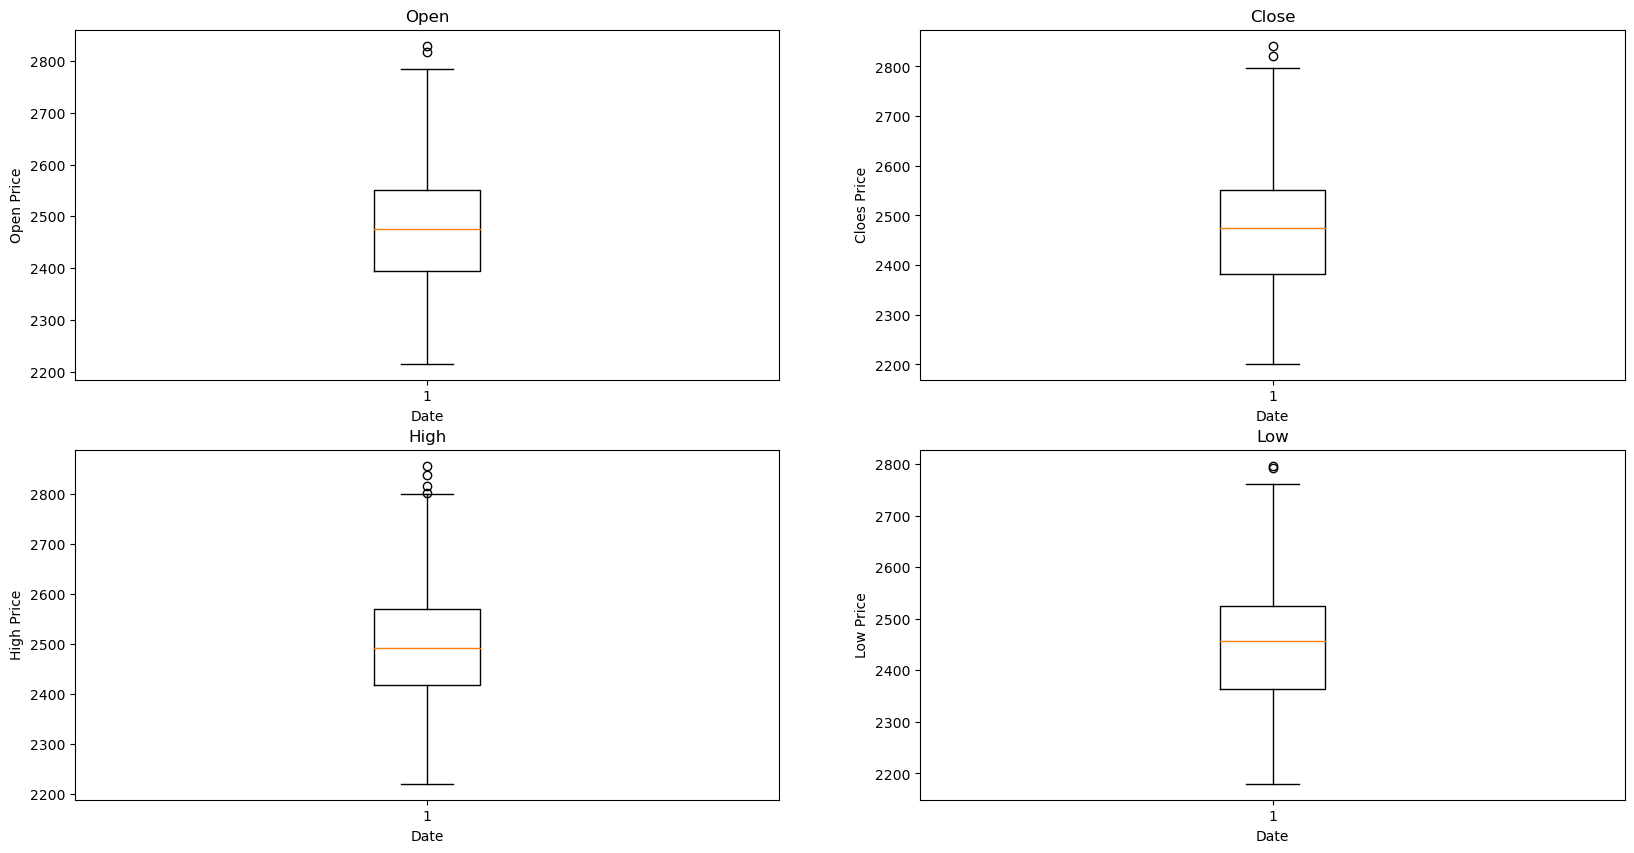

In [20]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(data_1['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(data_1['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(data_1['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(data_1['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

In [21]:
import pandas as pd
import numpy as np
from scipy import stats

# Generate a sample DataFrame (replace this with your actual data)
data = {'Value': [10, 15, 12, 14, 100, 11, 13, 16, 9, 110]}
df = pd.DataFrame(data)

# Define a threshold for identifying outliers based on Z-score
threshold = 3  # You can adjust this threshold as needed

# Calculate the Z-scores for each data point
z_scores = np.abs(stats.zscore(df['Value']))

# Create a mask to identify outliers
outlier_mask = z_scores > threshold

# Remove outliers from the DataFrame
df_no_outliers = df[~outlier_mask]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers)


DataFrame without outliers:
   Value
0     10
1     15
2     12
3     14
4    100
5     11
6     13
7     16
8      9
9    110


Text(0.5, 1.0, 'Low')

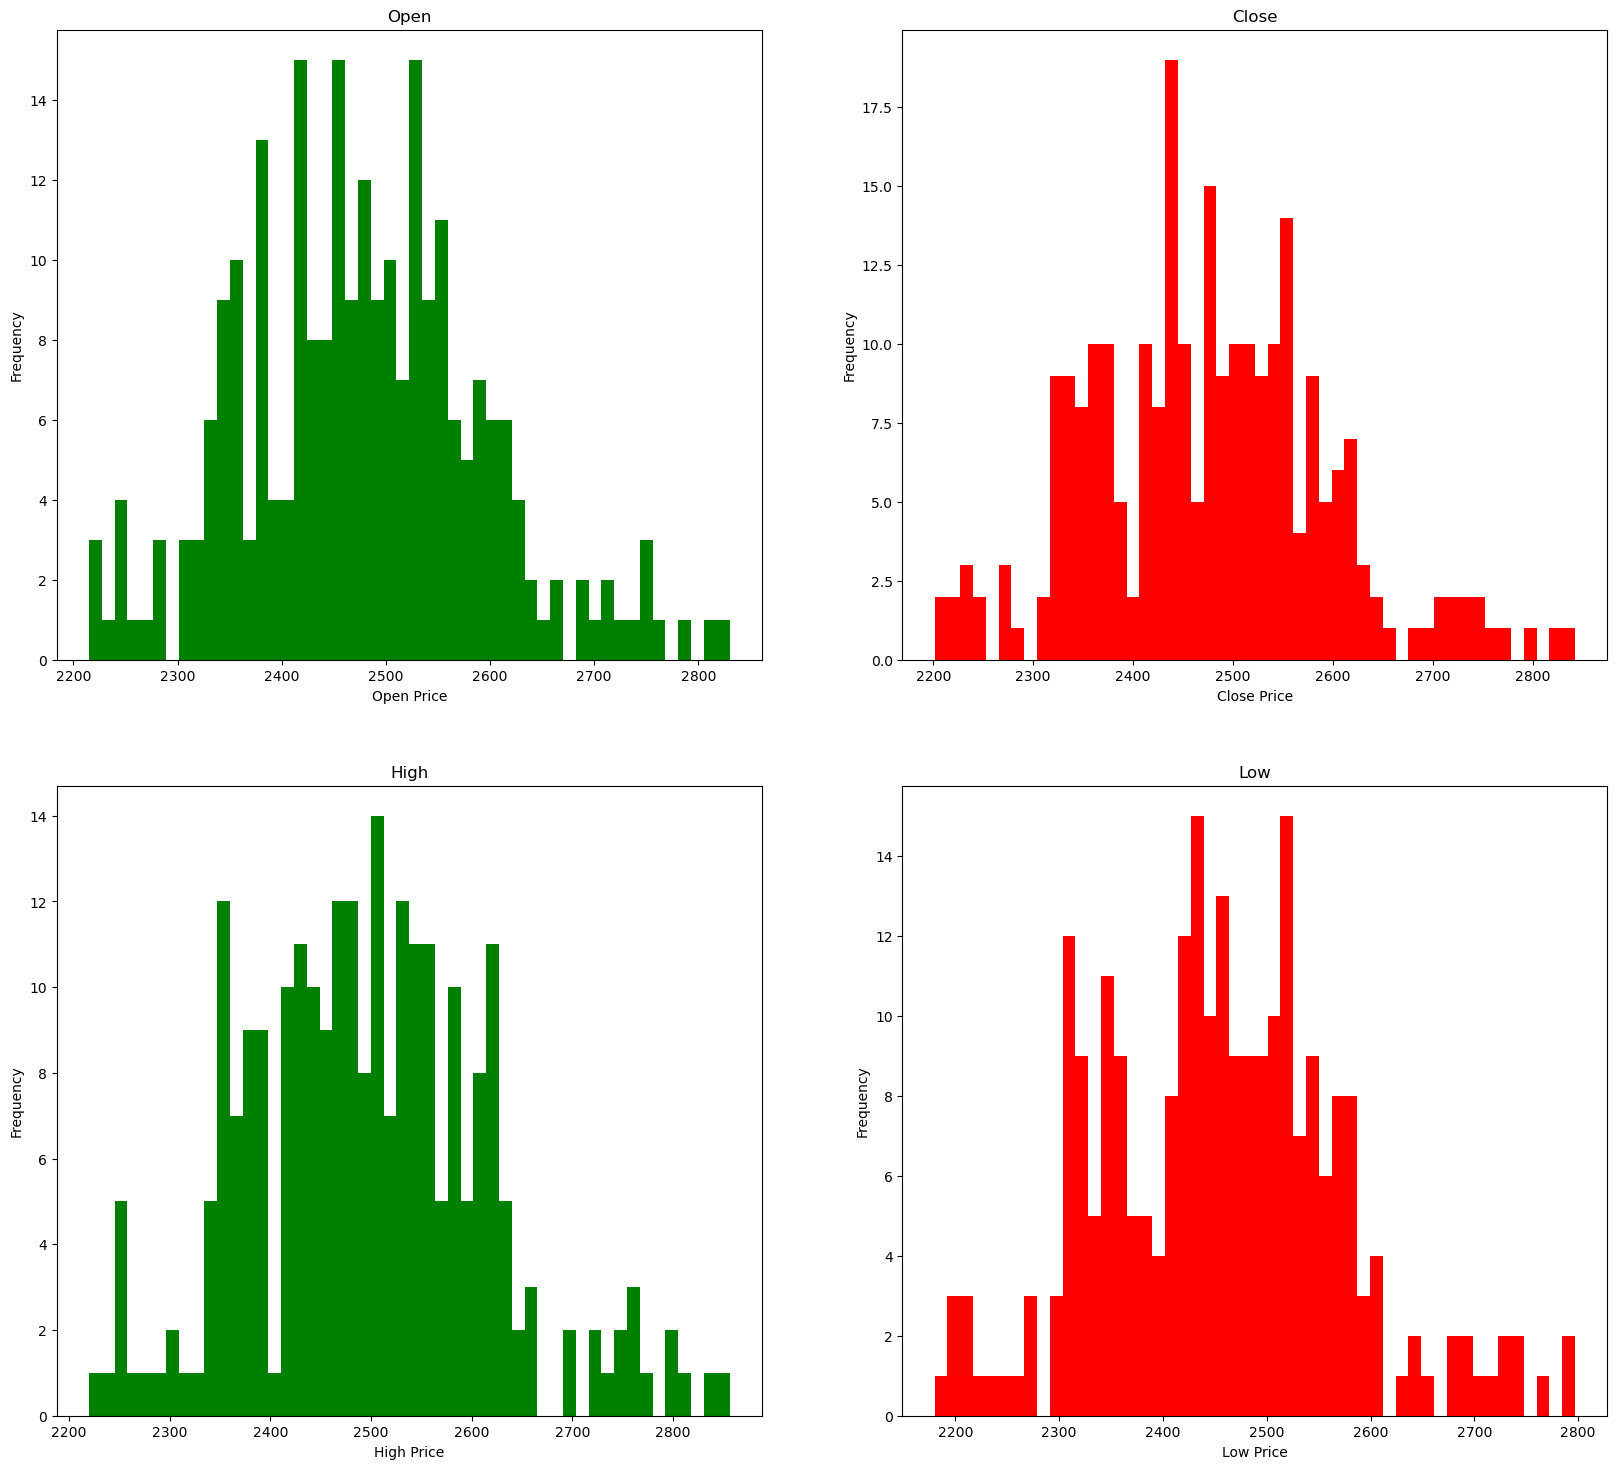

In [22]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(data_1['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(data_1['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(data_1['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(data_1['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

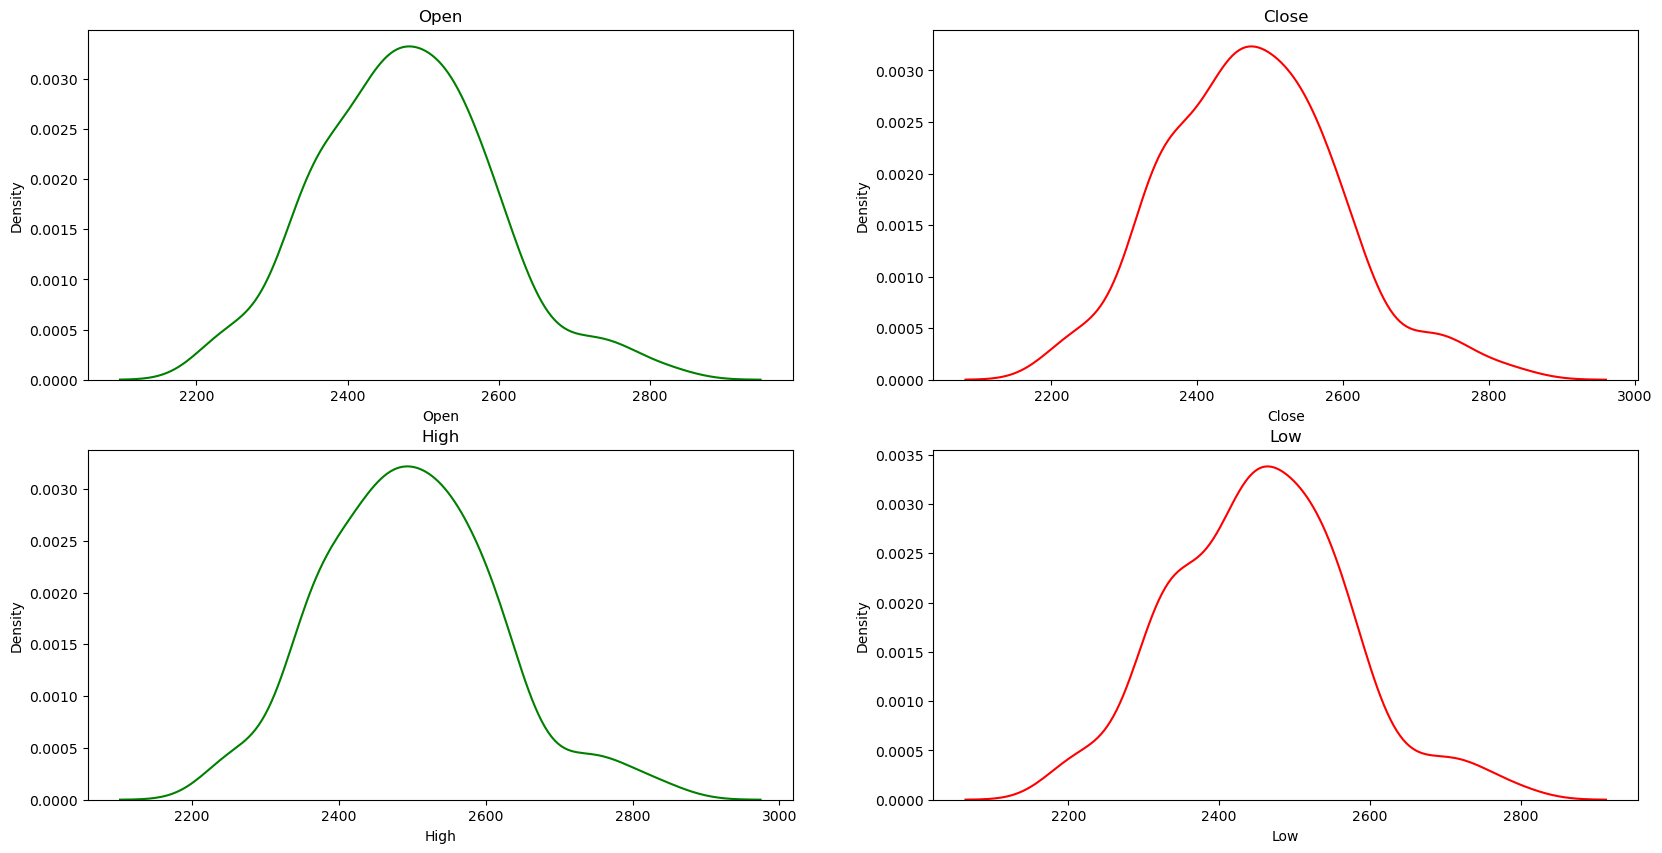

In [23]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(data_1['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(data_1['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(data_1['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(data_1['Low'], color='red')
plt.title('Low')

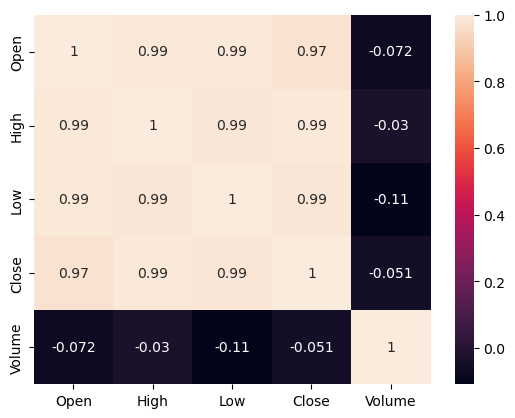

In [24]:
sns.heatmap(data_1.corr(),annot=True)
plt.show()

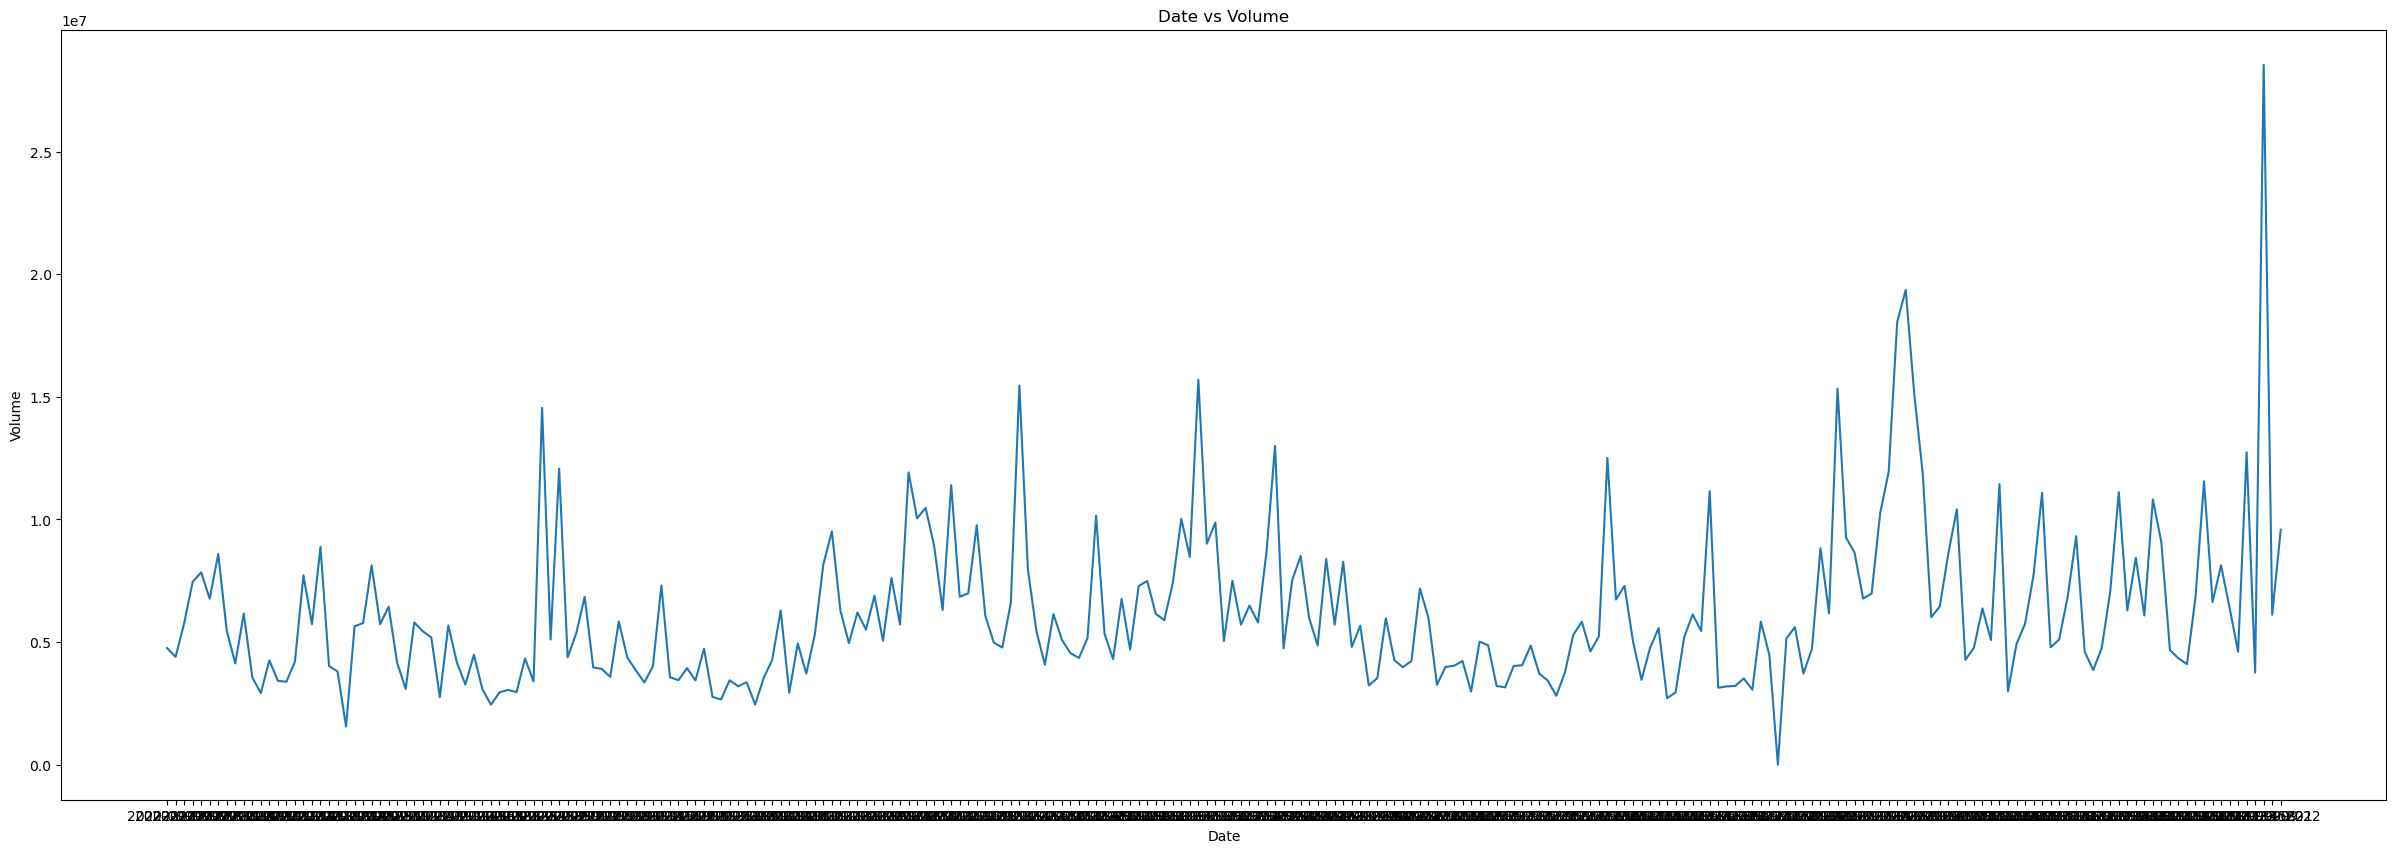

In [25]:
figure=plt.figure(figsize=(30,10))
plt.plot(data_1['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

# **Finding long-term and short-term trends**
* Moving Average

In [26]:
data_ma=data_1.copy()
data_ma['30-day MA']=data_1['Close'].rolling(window=30).mean()
data_ma['200-day MA']=data_1['Close'].rolling(window=200).mean()

In [27]:
data_ma

Open         High          Low        Close    Volume  \
Date                                                                       
2022-09-22  2486.000000  2503.000000  2472.100098  2486.100098   4757219   
2022-09-23  2485.000000  2495.949951  2436.100098  2439.500000   4397194   
2022-09-26  2394.050049  2417.800049  2375.149902  2377.350098   5759298   
2022-09-27  2394.000000  2426.000000  2360.100098  2396.250000   7455448   
2022-09-28  2360.350098  2378.000000  2327.100098  2332.449951   7844140   
...                 ...          ...          ...          ...       ...   
2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098  12734296   
2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951   3758150   
2023-09-20  2423.050049  2427.600098  2355.000000  2382.149902  28540942   
2023-09-21  2374.949951  2390.100098  2360.000000  2364.800049   6113091   
2023-09-22  2376.000000  2382.449951  2350.000000  2354.949951   9583430   

              30-day MA   200-day MA  
Date                                  
2022-09-22          NaN          NaN  
2022-09-23          NaN          NaN  
2022-09-26          NaN          NaN  
2022-09-27          NaN          NaN  
2022-09-28          NaN          NaN  
...                 ...          ...  
2023-09-15  2480.948340  2472.594757  
2023-09-18  2478.511670  2471.216007  
2023-09-20  2473.788330  2469.470006  
2023-09-21  2468.993335  2467.677506  
2023-09-22  2463.318335  2465.841506  

[249 rows x 7 columns]

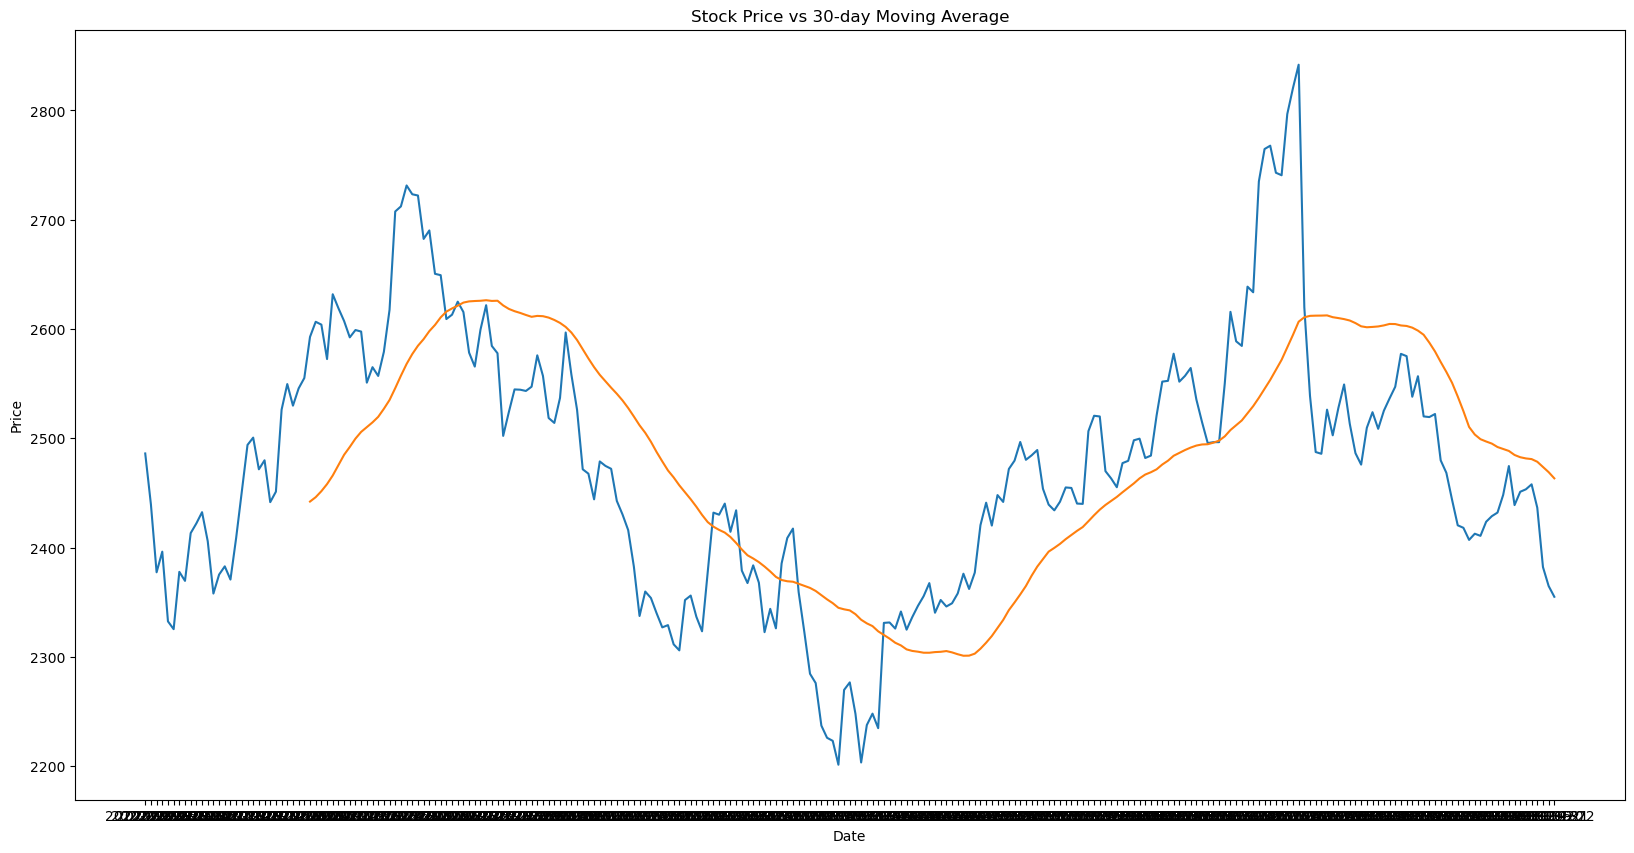

In [28]:
plt.figure(figsize=(20,10))
plt.plot(data_ma['Close'],label='Original data')
plt.plot(data_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

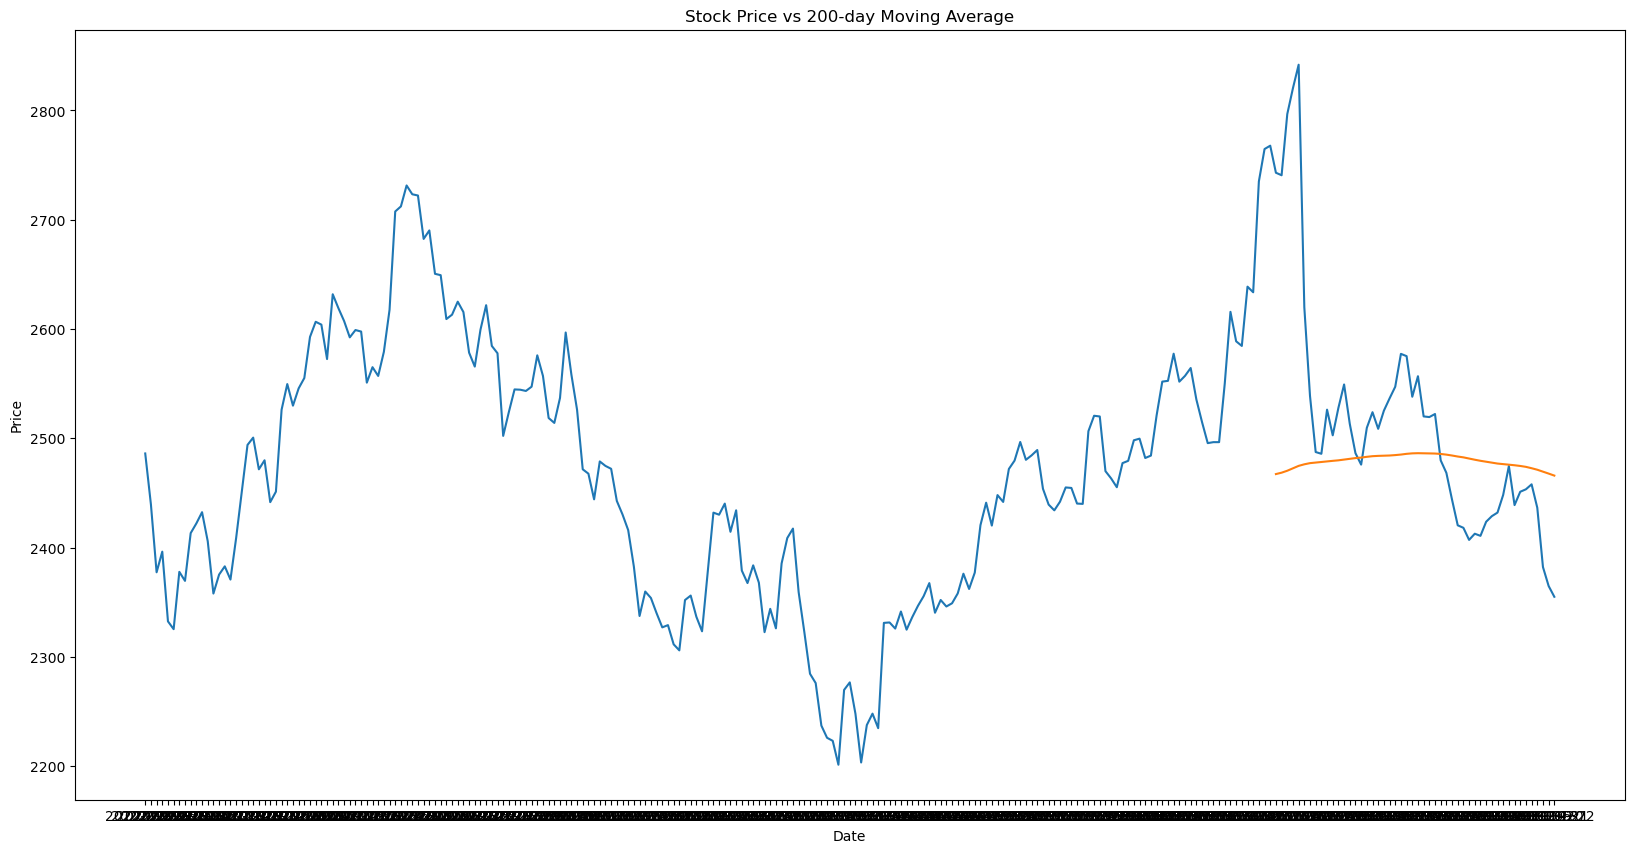

In [29]:
plt.figure(figsize=(20,10))
plt.plot(data_ma['Close'],label='Original data')
plt.plot(data_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [30]:
data_ma.describe()

Open         High          Low        Close        Volume  \
count   249.000000   249.000000   249.000000   249.000000  2.490000e+02   
mean   2477.553810  2496.526496  2455.008645  2475.208643  6.183713e+06   
std     116.672752   118.814967   116.960104   119.562165  3.275971e+06   
min    2215.000000  2220.000000  2180.000000  2201.250000  0.000000e+00   
25%    2394.050049  2416.949951  2364.000000  2382.550049  4.060722e+06   
50%    2475.000000  2491.100098  2456.500000  2474.600098  5.440967e+06   
75%    2550.000000  2569.850098  2525.500000  2550.250000  7.291995e+06   
max    2830.000000  2856.000000  2797.000000  2841.850098  2.854094e+07   

         30-day MA   200-day MA  
count   220.000000    50.000000  
mean   2482.197765  2478.999713  
std     101.778344     5.774412  
min    2300.980013  2465.841506  
25%    2399.318772  2475.452757  
50%    2489.702502  2479.601758  
75%    2581.935004  2484.006884  
max    2626.336694  2486.345508

In [31]:
# Calculating IQR
IQR = 2569.85 - 2416.94
#printing
print("IQR : ",IQR)

#Calculating Lower & Upper Extreme
LE = 2416.94 - IQR * 1.5
UE = 2569.85 + IQR * 1.5
#printing
print("Lower Extreme : ",LE)
print("Upper Extreme : ",UE)


IQR :  152.90999999999985
Lower Extreme :  2187.5750000000003
Upper Extreme :  2799.2149999999997


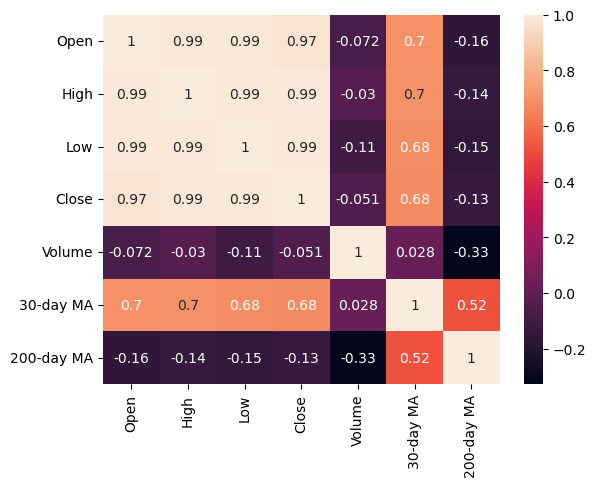

In [32]:
sns.heatmap(data_ma.corr(),annot=True)
plt.show()


# MODEL BUILDING

**Import Libraries**

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [34]:
data_1

Open         High          Low        Close    Volume
Date                                                                    
2022-09-22  2486.000000  2503.000000  2472.100098  2486.100098   4757219
2022-09-23  2485.000000  2495.949951  2436.100098  2439.500000   4397194
2022-09-26  2394.050049  2417.800049  2375.149902  2377.350098   5759298
2022-09-27  2394.000000  2426.000000  2360.100098  2396.250000   7455448
2022-09-28  2360.350098  2378.000000  2327.100098  2332.449951   7844140
...                 ...          ...          ...          ...       ...
2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098  12734296
2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951   3758150
2023-09-20  2423.050049  2427.600098  2355.000000  2382.149902  28540942
2023-09-21  2374.949951  2390.100098  2360.000000  2364.800049   6113091
2023-09-22  2376.000000  2382.449951  2350.000000  2354.949951   9583430

[249 rows x 5 columns]

In [35]:
close_df=pd.DataFrame(data_1['Close'])
close_df

Close
Date                   
2022-09-22  2486.100098
2022-09-23  2439.500000
2022-09-26  2377.350098
2022-09-27  2396.250000
2022-09-28  2332.449951
...                 ...
2023-09-15  2457.850098
2023-09-18  2436.449951
2023-09-20  2382.149902
2023-09-21  2364.800049
2023-09-22  2354.949951

[249 rows x 1 columns]

In [36]:
print(close_df.shape)

(249, 1)


In [37]:
close_df=close_df.reset_index()


In [38]:
close_df['Date']

0      2022-09-22
1      2022-09-23
2      2022-09-26
3      2022-09-27
4      2022-09-28
          ...    
244    2023-09-15
245    2023-09-18
246    2023-09-20
247    2023-09-21
248    2023-09-22
Name: Date, Length: 249, dtype: object

**Normalizing / scaling close value between 0 to 1**

In [39]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(249, 1)


**Split data for training and testing**

* Ratio for training and testing data is 80:20








In [40]:
training_size = int(len(closedf) * 0.8)
test_size = len(closedf) - training_size
train_data, test_data = closedf[:training_size, :], closedf[training_size:, :1]
print("train_data:", train_data.shape)
print("test_data:", test_data.shape)


train_data: (199, 1)
test_data: (50, 1)


**Create new dataset according to requirement of time-series prediction**

In [41]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (185, 13)
y_train:  (185,)
X_test:  (36, 13)
y_test (36,)


# Algorithms


**SUPPORT VECTOR REGRESSION**

In [43]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [44]:
train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (185, 1)
Test data prediction: (36, 1)


In [45]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [46]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------- ---------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  33.432917986485194
Train data MSE:  1117.760005091045
Test data MAE:  27.211631488823134
---------------- ---------------------------------------------------------------------
Test data RMSE:  29.80435893058616
Test data MSE:  888.2998112632112
Test data MAE:  22.622497668644442


In [47]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9335956710417886
Test data explained variance regression score: 0.7883732154601892


In [48]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9230505693032911
Test data R2 score: 0.7020724819076636


**Comparision between original stock close price vs predicted close price**


In [49]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


**Predicting next 30 days**


In [50]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**


In [51]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [52]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**


In [53]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Random Forest Regressor**


In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [55]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (185, 1)
Test data prediction: (36, 1)


In [56]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [57]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  13.034920891896745
Train data MSE:  169.90916265800624
Test data MAE:  9.948370725837815
-------------------------------------------------------------------------------------
Test data RMSE:  25.210676009615007
Test data MSE:  635.5781848617777
Test data MAE:  21.695417978888877


In [58]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9883190444012193
Test data explained variance regression score: 0.7977332999386404


In [59]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9883030227623656
Test data R2 score: 0.7868329715164224


**Comparision between original stock close price vs predicted close price**


In [60]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


**Predicting next 30 days**


In [61]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**


In [62]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [63]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**


In [64]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**K-nearest neighgbour - KNN**


In [65]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [66]:
train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (185, 1)
Test data prediction: (36, 1)


In [67]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [68]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  43.568301029412495
Train data MSE:  1898.1968545895056
Test data MAE:  34.56411579251561
-------------------------------------------------------------------------------------
Test data RMSE:  41.64824367524673
Test data MSE:  1734.5762012327295
Test data MAE:  32.635466735042705


In [69]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8699729886995365
Test data explained variance regression score: 0.593967376919724


In [70]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.8693233192763516
Test data R2 score: 0.41823922956775883


**Comparision between original stock close price vs predicted close price**


In [71]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


**Predicting next 30 days**


In [72]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**


In [73]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [74]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**


In [75]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**LSTM-Long Short-Term Memory**


In [76]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (185, 13, 1)
X_test:  (36, 13, 1)


In [77]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [78]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 13, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 13, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.1503 - val_loss: 0.0114
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0267 - val_loss: 0.0458
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0254 - val_loss: 0.0067
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0172 - val_loss: 0.0055
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0186 - val_loss: 0.0087
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - val_loss: 0.0157
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - val_loss: 0.0080
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0073
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0130 - val_loss: 0.0098
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0116 - val_loss: 0.0108
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0127 - val_loss: 0.0082
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0121 - val_l

In [80]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


((185, 1), (36, 1))

In [81]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [82]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  43.86985273678762
Train data MSE:  1924.5639791474323
Test data MAE:  34.6445167316723
-------------------------------------------------------------------------------------
Test data RMSE:  33.651861851345565
Test data MSE:  1132.4478060620468
Test data MAE:  27.605299164930557


In [83]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))


Train data explained variance regression score: 0.8676887339770618
Test data explained variance regression score: 0.6379333948138615


In [84]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.8675081396182851
Test data R2 score: 0.6201875088216064


**Comparision between original stock close price vs predicted close price**


In [85]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


**Predicting next 30 days**


In [86]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**


In [87]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [88]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**


In [89]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**GRU -Gated Recurrent Unit**


In [90]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (185, 13, 1)
X_test:  (36, 13, 1)


In [91]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 13, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 13, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,077 (246.40 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,052 (164.27 KB)

In [92]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0042 - val_loss: 0.0058
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045 - val_loss: 0.0087
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0051 - val_lo

In [93]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


((185, 1), (36, 1))

In [94]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [95]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  35.399510105870355
Train data MSE:  1253.1253157356173
Test data MAE:  27.45084988445945
-------------------------------------------------------------------------------------
Test data RMSE:  24.828849663986293
Test data MSE:  616.4717756368323
Test data MAE:  21.288825126736103


In [96]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9314518666907565
Test data explained variance regression score: 0.8319023718733605


In [97]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9137316783582402
Test data R2 score: 0.7932410839665981


**Comparision between original stock close price vs predicted close price**


In [98]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


In [99]:
plotdf.head(100)

Date  original_close  train_predicted_close  test_predicted_close
0   2022-09-22     2486.100098                    NaN                   NaN
1   2022-09-23     2439.500000                    NaN                   NaN
2   2022-09-26     2377.350098                    NaN                   NaN
3   2022-09-27     2396.250000                    NaN                   NaN
4   2022-09-28     2332.449951                    NaN                   NaN
..         ...             ...                    ...                   ...
95  2023-02-08     2351.949951            2301.945312                   NaN
96  2023-02-09     2356.050049            2323.565430                   NaN
97  2023-02-10     2336.649902            2340.782471                   NaN
98  2023-02-13     2323.350098            2338.824463                   NaN
99  2023-02-14     2378.100098            2328.333252                   NaN

[100 rows x 4 columns]

**Predicting next 30 days**


In [100]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


**Plotting last 15 days and next predicted 30 days**


In [101]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [102]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting whole closing stock price with prediction**


In [103]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [104]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

svr           rf          knn         lstm          gru
0    2486.100098  2486.100098  2486.100098  2486.100098  2486.100098
1    2439.500000  2439.500000  2439.500000  2439.500000  2439.500000
2    2377.350098  2377.350098  2377.350098  2377.350098  2377.350098
3    2396.250000  2396.250000  2396.250000  2396.250000  2396.250000
4    2332.449951  2332.449951  2332.449951  2332.449951  2332.449951
..           ...          ...          ...          ...          ...
274  2892.265563  2414.242510  2468.830792  2405.137018  2314.272002
275  2917.675438  2413.176008  2471.069242  2406.710892  2314.783222
276  2941.225437  2411.694004  2472.030781  2408.264433  2315.119449
277  2961.679336  2410.963503  2475.646165  2409.807798  2315.299634
278  2978.585105  2411.490000  2462.903846  2411.335681  2315.344689

[279 rows x 5 columns]

**Conclusion Chart**


In [105]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [106]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.923051       0.702072
1  Random Forest        0.988303       0.786833
2            KNN        0.869323       0.418239
3           LSTM        0.867508       0.620188
4            GRU        0.913732       0.793241

* By Looking into this table we can say that our   RANDOM FOREST model have best R2 score.
* so we are going to use RANDOM FOREST model for our deployment part.